In [6]:
from pandas import read_csv

beans = read_csv('dry_beans.csv')
print(beans.head())

   Unnamed: 0   Area  Perimeter  ...  ShapeFactor2  ShapeFactor3  ShapeFactor4
0           0  28395    610.291  ...      0.003147      0.834222      0.998724
1           1  28734    638.018  ...      0.003564      0.909851      0.998430
2           2  29380    624.110  ...      0.003048      0.825871      0.999066
3           3  30008    645.884  ...      0.003215      0.861794      0.994199
4           4  30140    620.134  ...      0.003665      0.941900      0.999166

[5 rows x 17 columns]


In [61]:
# Datapoints
beans.describe()

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,6805.000000,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,3929.301592,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,0.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3402.500000,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,6805.000000,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,10207.500000,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,13610.000000,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
import matplotlib.pyplot as plt


# Scatter EVERYTHING

i = 2
headers = beans.keys()
combinations = []
while i < len(headers):
    j = 2
    while j < len(headers):
        if i != j and [j, i] not in combinations:
            plt.scatter(beans[headers[i]], beans[headers[j]])
            plt.xlabel(f'{i}: {headers[i]}')
            plt.ylabel(f'{j}: {headers[j]}')
            plt.show()
        j += 1
    i += 1


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimal_kmeans(data, max_clusters=10):
    silhouette_scores = []
    k_values = range(2, max_clusters + 1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, clusters)
        silhouette_scores.append(silhouette_avg)
    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
    return optimal_k, silhouette_scores

optimal_kmeans(beans)

(2,
 [0.8365296783971512,
  0.6402906054242495,
  0.5167404350402445,
  0.48560295954497307,
  0.47422874672059906,
  0.4688149968356335,
  0.4549133840907269,
  0.4749836661321823,
  0.47889710286983816])

In [73]:
from sklearn.preprocessing import normalize
from numpy import mean

normal_beans = normalize(beans)
mean_beans = mean(normal_beans, 0)

biggest = [0,0]
second = [0,0]

for index, value in enumerate(mean_beans):
    if value > biggest[1]:
        second = biggest
        biggest = [index, value]
    elif value > second[1]:
        second = [index, value]

print(headers[biggest[0]], biggest[1])
print(headers[second[0]], second[1])


ConvexArea 0.7037746236189917
Area 0.6947119993994474


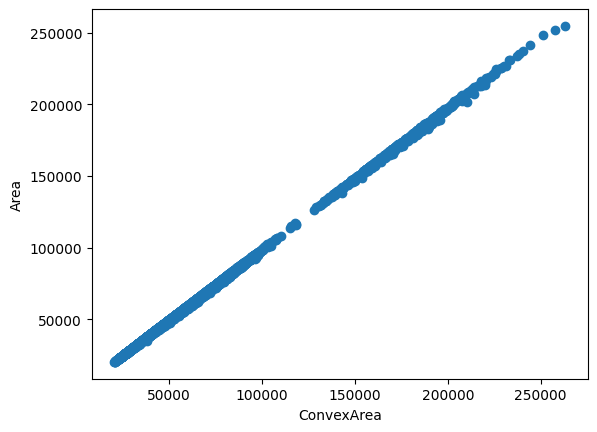

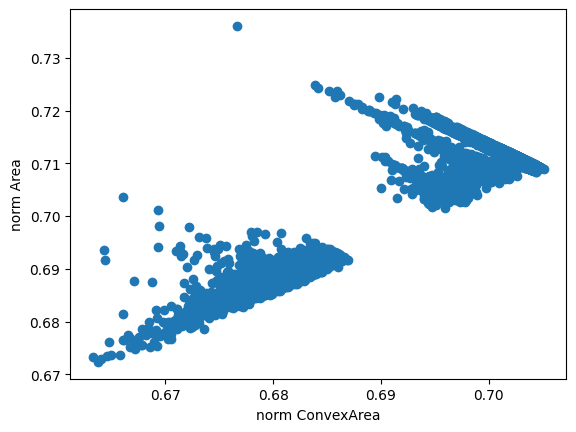

In [74]:
x = headers[biggest[0]]
y = headers[second[0]]

plt.scatter(beans[x], beans[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

biggest_values = []
second_values = []
for row in normal_beans:
    biggest_values.append(row[biggest[0]])
    second_values.append(row[second[0]])


plt.scatter(second_values, biggest_values)
plt.xlabel('norm ' + x)
plt.ylabel('norm ' + y)
plt.show()

[9.92410057e-01 7.55759729e-03 3.03069141e-05 1.85613365e-06
 1.58743284e-07 2.36343108e-08 2.55066521e-10 1.15128648e-12
 7.23853777e-13 1.05958720e-13 3.15190000e-14 7.12593866e-15
 1.18443442e-15 1.90011093e-16 5.51940240e-18 4.43302293e-18
 1.45398370e-19]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


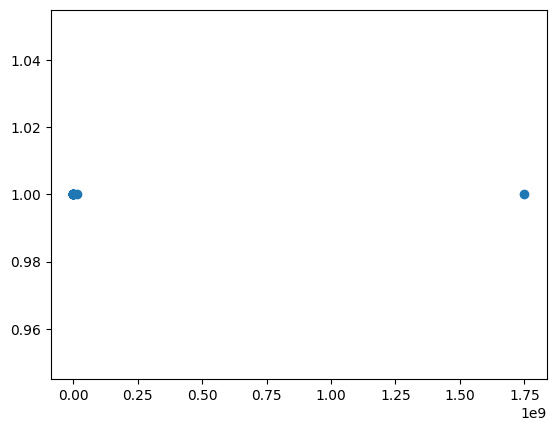

In [67]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(beans)
print(pca.explained_variance_ratio_)

y = [1 for _ in pca.explained_variance_]
print(y)

plt.scatter(pca.explained_variance_, y)